In [1]:
from urllib.request import urlretrieve

In [1]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

NameError: name 'pd' is not defined

In [3]:
import pandas as pd

In [4]:
covid_df = pd.read_csv("italy-covid-daywise.csv")


In [5]:
type(covid_df)

pandas.core.frame.DataFrame

In [6]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


metrics reported are newcases,new deaths,newtests
data is provided for 248 days

In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


each column has a different datatype


In [8]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [9]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [10]:
covid_df.shape

(248, 4)

### Retrieving data from a dataframe

In [11]:
covid_df["new_cases"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [12]:
covid_df.at[246,"new_cases"]

975.0

.at[index,"column"]

In [13]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [14]:
covid_df.new_tests.first_valid_index()

111

first_valid_index,method

In [15]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
32,2020-02-01,0.0,0.0,NaN
15,2020-01-15,0.0,0.0,NaN
97,2020-04-06,4316.0,527.0,NaN
39,2020-02-08,0.0,0.0,NaN
54,2020-02-23,62.0,2.0,NaN
228,2020-08-15,574.0,3.0,25937.0
143,2020-05-22,642.0,156.0,42987.0
202,2020-07-20,218.0,3.0,14121.0
148,2020-05-27,397.0,78.0,37299.0
246,2020-09-02,975.0,8.0,NaN


.sample  method to retrieve randoms

### Analyzing data from data frames

In [16]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()
total_tests = covid_df.new_tests.sum()


total number of reported cases,deaths and tests

In [17]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 271515 and the number of reported deaths is 35497.


In [18]:
death_rate = covid_df.new_deaths.sum()/covid_df.new_cases.sum()
death_rate

0.13073679170579894

In [19]:
print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))

The overall reported death rate in Italy is 13.07 %.


In [20]:
positive_rate = str(total_cases/total_tests)
print("The positive rate is".format(positive_rate*100))

The positive rate is


### Querying and sorting rows

In [21]:
high_new_cases = covid_df.new_cases>1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

days which had more than 1000 reported cases.

In [22]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [23]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

In [24]:
covid_df["positive_rate"] = covid_df.new_cases/covid_df.new_tests
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


adding new columns to dataframe

In [25]:
covid_df.drop(columns=['positive_rate'], inplace=True)

In [26]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


### Sorting rows using columns values

In [27]:
covid_df.sort_values("new_cases",ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [28]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


index 172,has a negative number,the value can be replaced with a 0,average of the column or  discard the row

In [29]:
covid_df.at[172,"new_cases"] = (covid_df.at[172,"new_cases"]+covid_df.at[172,"new_cases"])/2

### working with dates

In [30]:
covid_df.dtypes

date           object
new_cases     float64
new_deaths    float64
new_tests     float64
dtype: object

In [31]:
covid_df["date"] = pd.to_datetime(covid_df.date)
covid_df.dtypes

date          datetime64[ns]
new_cases            float64
new_deaths           float64
new_tests            float64
dtype: object

coverting date columns to datetime datatype

In [32]:
#using dt
covid_df["month"] = covid_df["date"].dt.month_name()
covid_df["day"] = covid_df["date"].dt.day_name()




extracting parts of the date data into separate columns

In [33]:
covid_df

,date,new_cases,new_deaths,new_tests,month,day
0,2019-12-31,0.0,0.0,NaN,December,Tuesday
1,2020-01-01,0.0,0.0,NaN,January,Wednesday
2,2020-01-02,0.0,0.0,NaN,January,Thursday
3,2020-01-03,0.0,0.0,NaN,January,Friday
4,2020-01-04,0.0,0.0,NaN,January,Saturday
...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,August,Sunday
244,2020-08-31,1365.0,4.0,42583.0,August,Monday
245,2020-09-01,996.0,6.0,54395.0,September,Tuesday
246,2020-09-02,975.0,8.0,NaN,September,Wednesday


In [34]:
covid_df["year"] = pd.DatetimeIndex(covid_df.date).year
covid_df["month"] = pd.DatetimeIndex(covid_df.date).month
covid_df["day"] = pd.DatetimeIndex(covid_df.date).day
covid_df["weekday"] =pd.DatetimeIndex(covid_df.date).weekday

In [35]:
covid_df

,date,new_cases,new_deaths,new_tests,month,day,year,weekday
0,2019-12-31,0.0,0.0,NaN,12,31,2019,1
1,2020-01-01,0.0,0.0,NaN,1,1,2020,2
2,2020-01-02,0.0,0.0,NaN,1,2,2020,3
3,2020-01-03,0.0,0.0,NaN,1,3,2020,4
4,2020-01-04,0.0,0.0,NaN,1,4,2020,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,8,30,2020,6
244,2020-08-31,1365.0,4.0,42583.0,8,31,2020,0
245,2020-09-01,996.0,6.0,54395.0,9,1,2020,1
246,2020-09-02,975.0,8.0,NaN,9,2,2020,2


In [36]:
covid_df_may = covid_df[covid_df.month == 5 ]
covid_df_may


,date,new_cases,new_deaths,new_tests,month,day,year,weekday
122,2020-05-01,1872.0,285.0,43732.0,5,1,2020,4
123,2020-05-02,1965.0,269.0,31231.0,5,2,2020,5
124,2020-05-03,1900.0,474.0,27047.0,5,3,2020,6
125,2020-05-04,1389.0,174.0,22999.0,5,4,2020,0
126,2020-05-05,1221.0,195.0,32211.0,5,5,2020,1
127,2020-05-06,1075.0,236.0,37771.0,5,6,2020,2
128,2020-05-07,1444.0,369.0,13665.0,5,7,2020,3
129,2020-05-08,1401.0,274.0,45428.0,5,8,2020,4
130,2020-05-09,1327.0,243.0,36091.0,5,9,2020,5
131,2020-05-10,1083.0,194.0,31384.0,5,10,2020,6


query the rows for may

In [37]:
covid_df_may_metrics = covid_df_may[["new_cases","new_deaths","new_tests"]]
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


metrics for may

In [38]:
covid_may_totals = covid_df_may_metrics.sum()
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

column-wise totals

In [39]:
type(covid_may_totals)

pandas.core.series.Series

In [40]:
#overall average
covid_df.new_cases.mean()

1094.8185483870968

In [41]:
#average for sundays
covid_df[covid_df.weekday == 6].new_cases.mean()


1247.2571428571428

### Grouping and aggregation

In [42]:
covid_month_df = covid_df.groupby("month")[["new_cases","new_deaths","new_tests"]].sum()
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [43]:
covid_df["total_cases"] = covid_df.new_cases.cumsum()
covid_df["total_deaths"] = covid_df.new_deaths.cumsum()
covid_df["total_tests"] = covid_df.new_tests.cumsum()
covid_df

,date,new_cases,new_deaths,new_tests,month,day,year,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,12,31,2019,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,1,1,2020,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,1,2,2020,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,1,3,2020,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,1,4,2020,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,8,30,2020,6,266853.0,35473.0,4182478.0
244,2020-08-31,1365.0,4.0,42583.0,8,31,2020,0,268218.0,35477.0,4225061.0
245,2020-09-01,996.0,6.0,54395.0,9,1,2020,1,269214.0,35483.0,4279456.0
246,2020-09-02,975.0,8.0,NaN,9,2,2020,2,270189.0,35491.0,NaN


using the cumsum()method

### merging data from multiple sources

In [44]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x17bdbb708e0>)

In [45]:
locations_df = pd.read_csv("locations.csv")
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [46]:
locations_df[locations_df.location =="Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. Let's insert a `location` column in the `covid_df` dataframe with all values set to `"Italy"`.

In [47]:
covid_df["location"] = "Italy"
covid_df

,date,new_cases,new_deaths,new_tests,month,day,year,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,12,31,2019,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,1,1,2020,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,1,2,2020,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,1,3,2020,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,1,4,2020,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,8,30,2020,6,266853.0,35473.0,4182478.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,8,31,2020,0,268218.0,35477.0,4225061.0,Italy
245,2020-09-01,996.0,6.0,54395.0,9,1,2020,1,269214.0,35483.0,4279456.0,Italy
246,2020-09-02,975.0,8.0,NaN,9,2,2020,2,270189.0,35491.0,NaN,Italy


We can now add the columns from `locations_df` into `covid_df` using the `.merge` method.

In [48]:
merged_df = covid_df.merge(locations_df,on="location")
merged_df

,date,new_cases,new_deaths,new_tests,month,day,year,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,12,31,2019,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,1,1,2020,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,1,2,2020,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,1,3,2020,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,1,4,2020,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,8,30,2020,6,266853.0,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,8,31,2020,0,268218.0,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,9,1,2020,1,269214.0,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,9,2,2020,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


### writing data back to files

## Writing data back to files

After completing your analysis and adding new columns, you should write the results back to a file. Otherwise, the data will be lost when the Jupyter notebook shuts down. Before writing to file, let us first create a data frame containing just the columns we wish to record.

In [49]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests']]
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,4182478.0
244,2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,4225061.0
245,2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,4279456.0
246,2020-09-02,975.0,270189.0,8.0,35491.0,NaN,NaN


### Basic plotting with pandas

<AxesSubplot:>

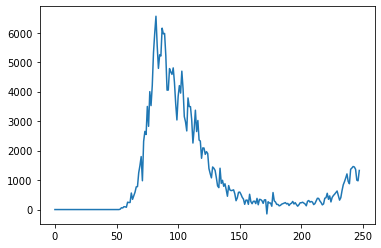

In [50]:
result_df.new_cases.plot()

While this plot shows the overall trend, it's hard to tell where the peak occurred, as there are no dates on the X-axis. We can use the `date` column as the index for the data frame to address this issue.

In [51]:
result_df.set_index("date",inplace=True)
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests
date,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...
2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,4182478.0
2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,4225061.0
2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,4279456.0


<AxesSubplot:xlabel='date'>

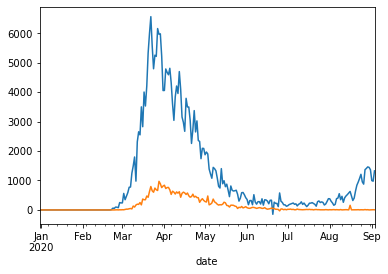

In [52]:
result_df.new_cases.plot()
result_df.new_deaths.plot()


<AxesSubplot:xlabel='date'>

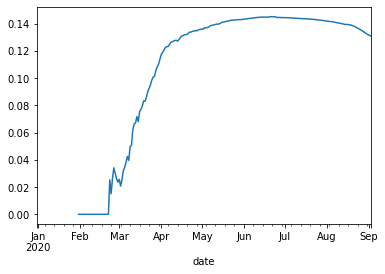

In [53]:
death_rate = result_df.total_deaths/result_df.total_cases
death_rate.plot()


<AxesSubplot:xlabel='month'>

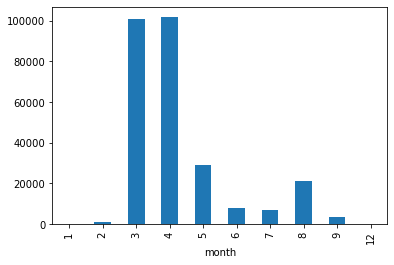

In [54]:
#new cases per month
covid_month_df.new_cases.plot(kind="bar")

<AxesSubplot:xlabel='month'>

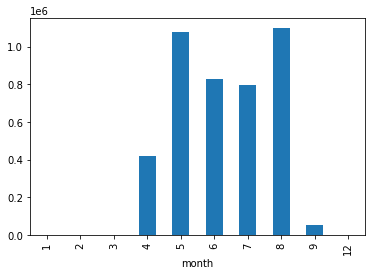

In [55]:
#tests per month[;[]]
covid_month_df.new_tests.plot(kind='bar')